In [1]:
%pip install -U matplotlib numpy pandas scipy scikit-learn 

  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl (7.5 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
def load_data(housing_path):
    return pd.read_csv(housing_path)

In [4]:
df = load_data("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,5.108285,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,24.912992,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.750000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.587500,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.562500,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.798175,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,987.000000,500001.000000


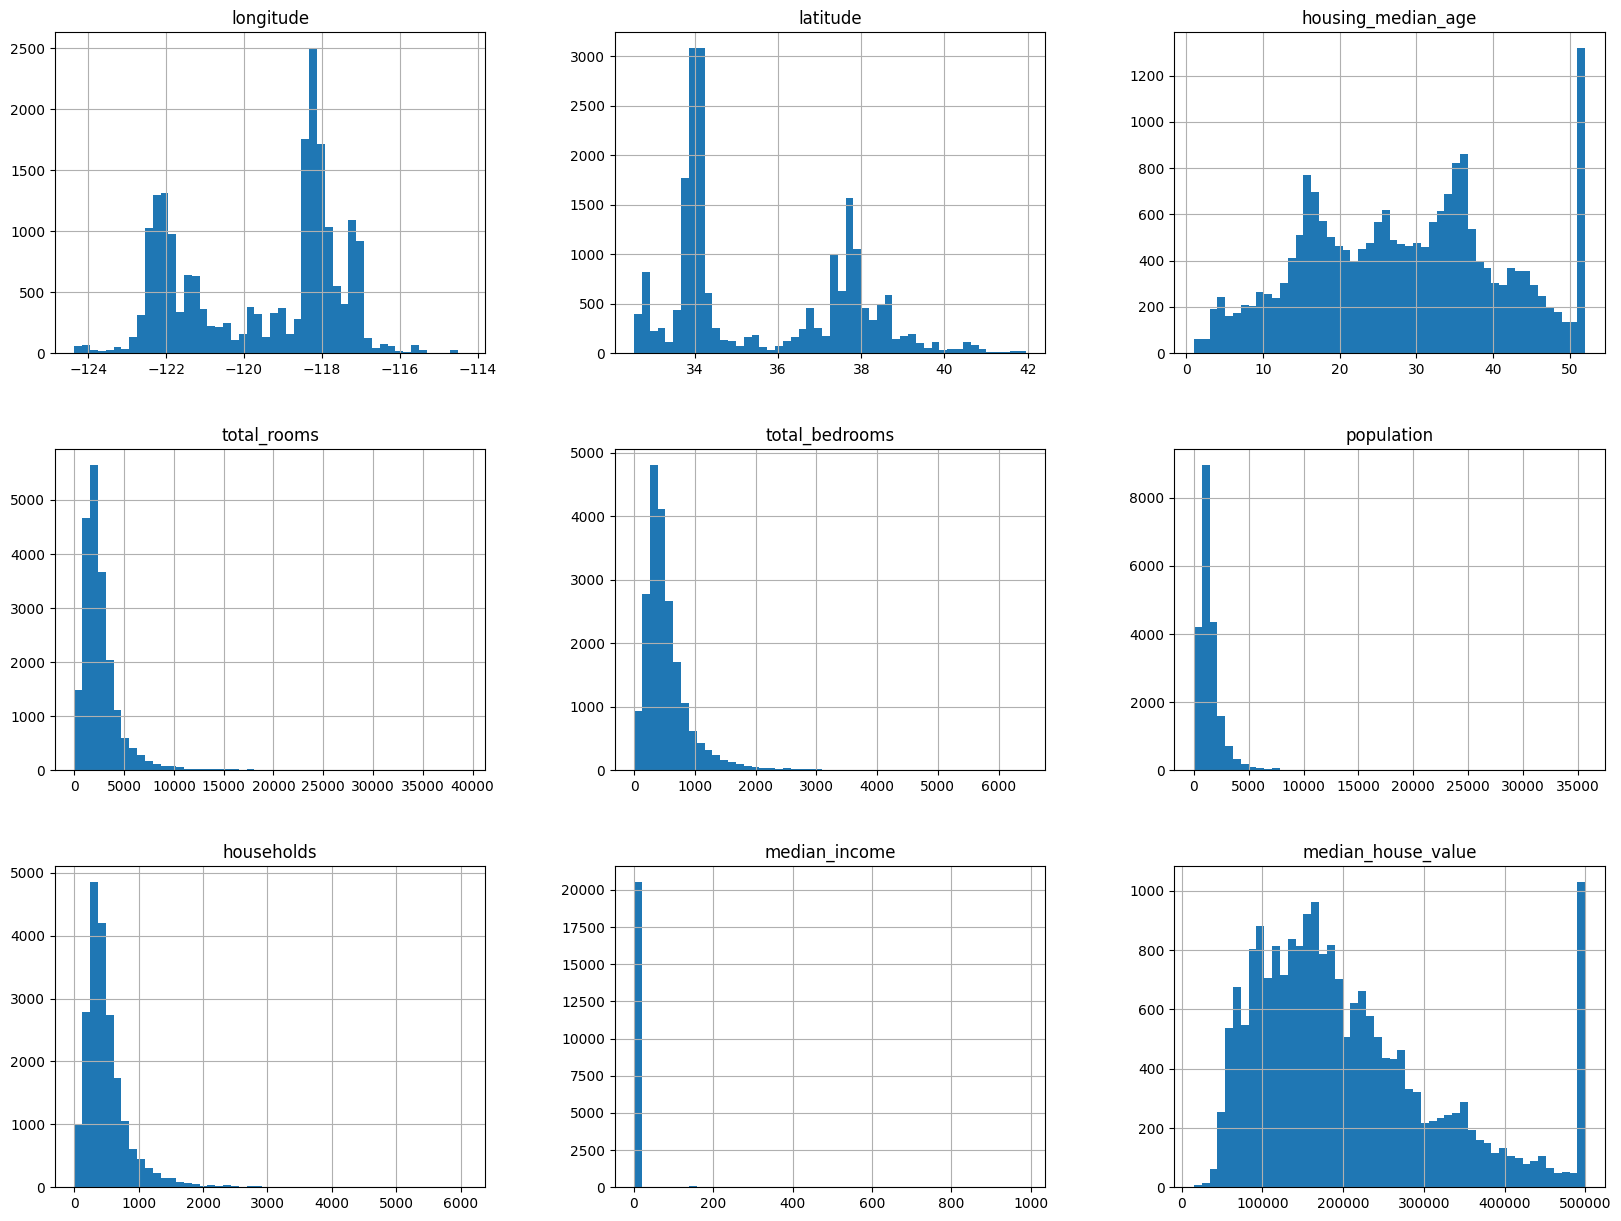

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
def split_train_test(data, test_ratio):
    suffled_indeces = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices =  suffled_indeces[:test_set_size]
    train_indeces = suffled_indeces[test_set_size:]
    return data.iloc[train_indeces], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

16512
4128


<Axes: >

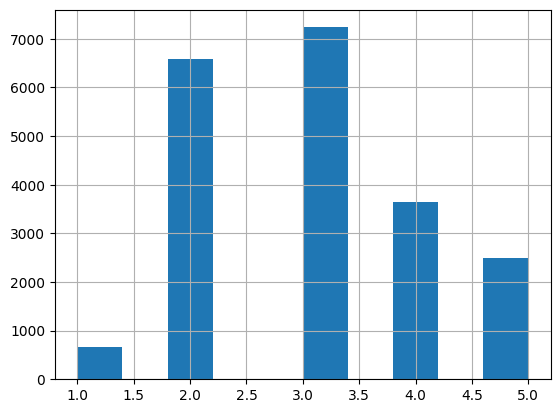

In [13]:
df["cat_income"] = pd.cut(df["median_income"],
                             bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1,2,3,4,5])
df["cat_income"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index , test_index in stratSplit.split(df, df["cat_income"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
strat_train_set["cat_income"].value_counts()/len(strat_train_set)

cat_income
3    0.350594
2    0.318859
4    0.176902
5    0.121124
1    0.032522
Name: count, dtype: float64

In [16]:
strat_test_set["cat_income"].value_counts()/len(strat_test_set)

cat_income
3    0.350533
2    0.318798
4    0.177083
5    0.121124
1    0.032461
Name: count, dtype: float64

In [17]:
df["cat_income"].value_counts()/len(df)

cat_income
3    0.350581
2    0.318847
4    0.176938
5    0.121124
1    0.032510
Name: count, dtype: float64

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("cat_income", axis=1,inplace=True)

In [19]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,94200.0,<1H OCEAN
11860,-121.23,40.01,38.0,725.0,190.0,219.0,115.0,1.6250,75000.0,INLAND
8050,-118.18,33.85,40.0,2597.0,582.0,1285.0,559.0,3.9750,213800.0,<1H OCEAN
16261,-121.26,37.96,35.0,1511.0,316.0,892.0,304.0,1.7898,63500.0,INLAND
7444,-118.19,33.95,42.0,2309.0,685.0,2609.0,673.0,2.7206,162100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3738,-118.39,34.19,25.0,3794.0,989.0,2454.0,876.0,2.9982,204200.0,<1H OCEAN
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167,156300.0,INLAND
12049,-117.56,33.88,36.0,838.0,210.0,722.0,180.0,2.4861,96200.0,INLAND
4551,-118.24,34.05,13.0,1703.0,697.0,1823.0,669.0,8.2880,181300.0,<1H OCEAN


In [20]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

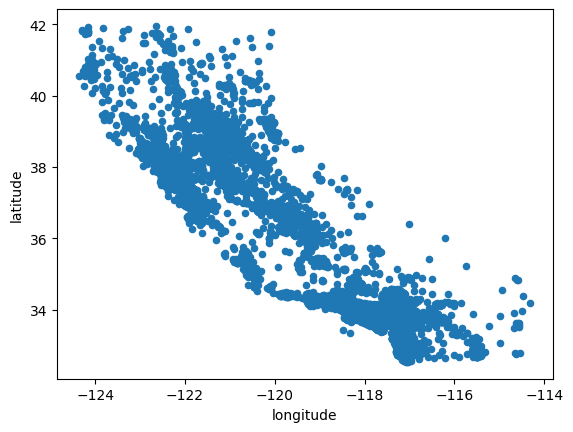

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

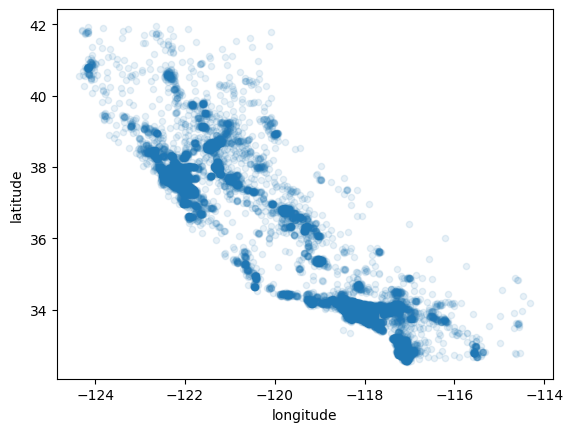

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

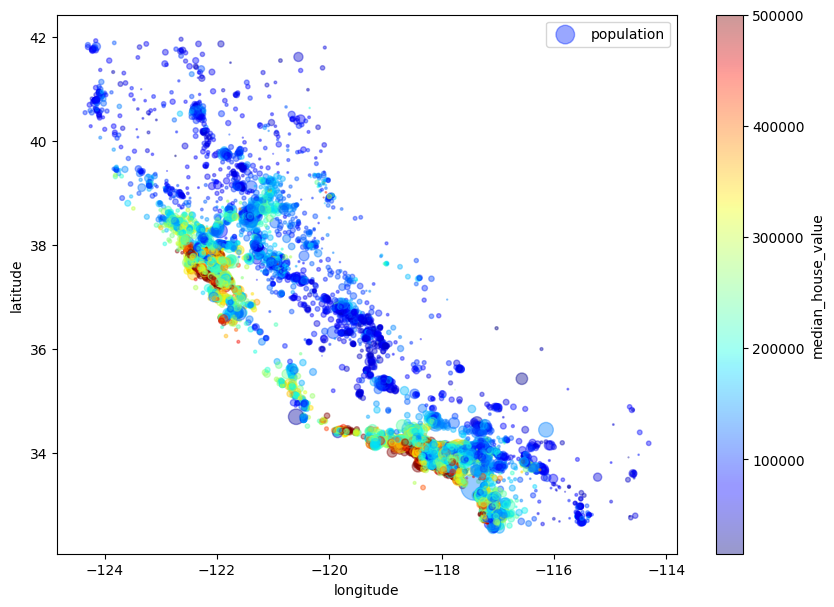

In [24]:
housing.plot(kind="scatter", x="longitude", 
             y="latitude",alpha=0.4, 
             s=housing["population"]/100,
             label="population", figsize=(10,7),
             c="median_house_value", 
             cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [28]:
housing_1 = housing.drop("ocean_proximity", axis=1, inplace=False) 
housing_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,94200.0
11860,-121.23,40.01,38.0,725.0,190.0,219.0,115.0,1.6250,75000.0
8050,-118.18,33.85,40.0,2597.0,582.0,1285.0,559.0,3.9750,213800.0
16261,-121.26,37.96,35.0,1511.0,316.0,892.0,304.0,1.7898,63500.0
7444,-118.19,33.95,42.0,2309.0,685.0,2609.0,673.0,2.7206,162100.0
...,...,...,...,...,...,...,...,...,...
3738,-118.39,34.19,25.0,3794.0,989.0,2454.0,876.0,2.9982,204200.0
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167,156300.0
12049,-117.56,33.88,36.0,838.0,210.0,722.0,180.0,2.4861,96200.0
4551,-118.24,34.05,13.0,1703.0,697.0,1823.0,669.0,8.2880,181300.0


In [29]:
corr_matrix = housing_1.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
total_rooms           0.133516
housing_median_age    0.115199
median_income         0.105775
households            0.064932
total_bedrooms        0.047294
population           -0.026069
longitude            -0.044975
latitude             -0.144532
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

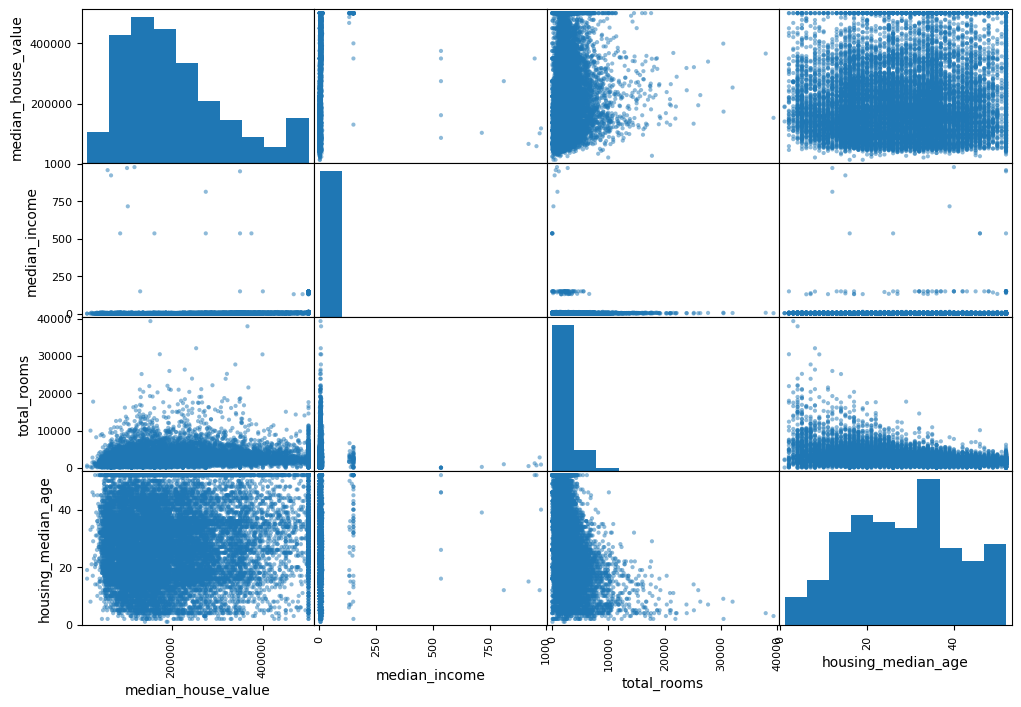

In [30]:
from pandas.plotting import scatter_matrix

attibutes = ["median_house_value","median_income",
             "total_rooms","housing_median_age" ]
scatter_matrix(housing[attibutes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

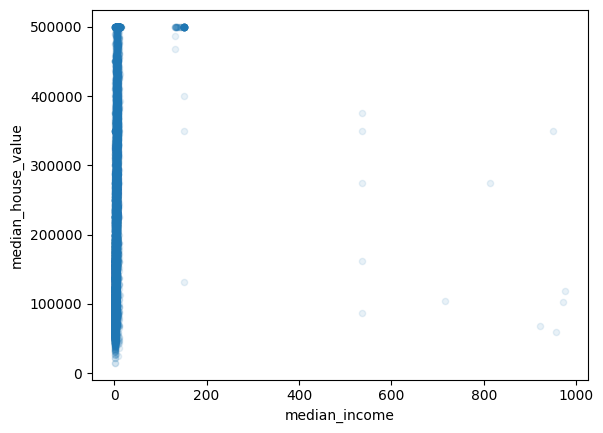

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,<1H OCEAN
11860,-121.23,40.01,38.0,725.0,190.0,219.0,115.0,1.6250,INLAND
8050,-118.18,33.85,40.0,2597.0,582.0,1285.0,559.0,3.9750,<1H OCEAN
16261,-121.26,37.96,35.0,1511.0,316.0,892.0,304.0,1.7898,INLAND
7444,-118.19,33.95,42.0,2309.0,685.0,2609.0,673.0,2.7206,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3738,-118.39,34.19,25.0,3794.0,989.0,2454.0,876.0,2.9982,<1H OCEAN
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167,INLAND
12049,-117.56,33.88,36.0,838.0,210.0,722.0,180.0,2.4861,INLAND
4551,-118.24,34.05,13.0,1703.0,697.0,1823.0,669.0,8.2880,<1H OCEAN


In [35]:
op1 = housing.copy()
op2 = housing.copy()
op3 = housing.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 5183 to 18293
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16345 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [36]:
print(len(op1))
op1.dropna(subset=["total_bedrooms"], inplace=True)
print(len(op1))

16512
16345


In [37]:
op2.drop("total_bedrooms", axis=1, inplace=True)
op2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
5183,-118.26,33.94,41.0,1510.0,1408.0,389.0,1.6500,<1H OCEAN
11860,-121.23,40.01,38.0,725.0,219.0,115.0,1.6250,INLAND
8050,-118.18,33.85,40.0,2597.0,1285.0,559.0,3.9750,<1H OCEAN
16261,-121.26,37.96,35.0,1511.0,892.0,304.0,1.7898,INLAND
7444,-118.19,33.95,42.0,2309.0,2609.0,673.0,2.7206,<1H OCEAN
...,...,...,...,...,...,...,...,...
3738,-118.39,34.19,25.0,3794.0,2454.0,876.0,2.9982,<1H OCEAN
12683,-121.41,38.55,14.0,2534.0,1495.0,583.0,1.9167,INLAND
12049,-117.56,33.88,36.0,838.0,722.0,180.0,2.4861,INLAND
4551,-118.24,34.05,13.0,1703.0,1823.0,669.0,8.2880,<1H OCEAN


In [39]:
median = op3["total_bedrooms"].median()
op3["total_bedrooms"].fillna(median, inplace=True)
op3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 5183 to 18293
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity",axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [41]:
print(imputer.statistics_)

[-118.51      34.26      29.      2131.       435.      1167.
  410.         3.56655]


In [42]:
print(housing_num.median().values)

[-118.51      34.26      29.      2131.       435.      1167.
  410.         3.56655]


In [43]:
X = imputer.transform(housing_num)
X

array([[-1.1826e+02,  3.3940e+01,  4.1000e+01, ...,  1.4080e+03,
         3.8900e+02,  1.6500e+00],
       [-1.2123e+02,  4.0010e+01,  3.8000e+01, ...,  2.1900e+02,
         1.1500e+02,  1.6250e+00],
       [-1.1818e+02,  3.3850e+01,  4.0000e+01, ...,  1.2850e+03,
         5.5900e+02,  3.9750e+00],
       ...,
       [-1.1756e+02,  3.3880e+01,  3.6000e+01, ...,  7.2200e+02,
         1.8000e+02,  2.4861e+00],
       [-1.1824e+02,  3.4050e+01,  1.3000e+01, ...,  1.8230e+03,
         6.6900e+02,  8.2880e+00],
       [-1.2211e+02,  3.7390e+01,  3.6000e+01, ...,  6.5500e+02,
         2.4900e+02,  6.3967e+00]])

In [44]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500
11860,-121.23,40.01,38.0,725.0,190.0,219.0,115.0,1.6250
8050,-118.18,33.85,40.0,2597.0,582.0,1285.0,559.0,3.9750
16261,-121.26,37.96,35.0,1511.0,316.0,892.0,304.0,1.7898
7444,-118.19,33.95,42.0,2309.0,685.0,2609.0,673.0,2.7206
...,...,...,...,...,...,...,...,...
3738,-118.39,34.19,25.0,3794.0,989.0,2454.0,876.0,2.9982
12683,-121.41,38.55,14.0,2534.0,705.0,1495.0,583.0,1.9167
12049,-117.56,33.88,36.0,838.0,210.0,722.0,180.0,2.4861
4551,-118.24,34.05,13.0,1703.0,697.0,1823.0,669.0,8.2880


In [45]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 5183 to 18293
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [46]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
5183,<1H OCEAN
11860,INLAND
8050,<1H OCEAN
16261,INLAND
7444,<1H OCEAN


In [47]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [4.],
       [3.],
       [3.],
       [4.],
       [0.]])

In [48]:
ordinal_encoder.categories_ 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat1hot = cat_encoder.fit_transform(housing_cat)
housing_cat1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(housing_tr.copy())
print(scaler.transform(housing_tr.copy()))

[[0.60657371 0.1487779  0.78431373 ... 0.03937891 0.0724286  0.0009219 ]
 [0.31075697 0.79383634 0.7254902  ... 0.00605398 0.02128057 0.00089629]
 [0.61454183 0.1392136  0.76470588 ... 0.0359315  0.10416278 0.00330346]
 ...
 [0.67629482 0.1424017  0.68627451 ... 0.02015191 0.03341422 0.00177834]
 [0.60856574 0.16046759 0.23529412 ... 0.0510104  0.12469666 0.00772138]
 [0.22310757 0.51540914 0.68627451 ... 0.01827405 0.04629457 0.00578407]]


In [51]:
from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
scaler_2.fit(housing_tr.copy())
housing_prepared = scaler_2.transform(housing_tr.copy())
housing_prepared

array([[ 0.65692793, -0.79519487,  0.9868345 , ..., -0.01882289,
        -0.29197785, -0.14714268],
       [-0.82487942,  2.04593437,  0.74810427, ..., -1.07063696,
        -1.01303186, -0.14825046],
       [ 0.69684193, -0.83732035,  0.90725776, ..., -0.12763124,
         0.15539143, -0.04411886],
       ...,
       [ 1.00617546, -0.82327852,  0.58895079, ..., -0.62567273,
        -0.8419789 , -0.11009399],
       [ 0.66690643, -0.74370818, -1.24131429, ...,  0.34829472,
         0.44486567,  0.14699585],
       [-1.26393345,  0.81961499,  0.58895079, ..., -0.68494232,
        -0.66039961,  0.06318986]])

In [52]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler',StandardScaler()),
                ])
housin_num_tr = num_pipeline.fit_transform(housing_num)
housin_num_tr

array([[ 0.65692793, -0.79519487,  0.9868345 , ..., -0.01882289,
        -0.29197785, -0.14714268],
       [-0.82487942,  2.04593437,  0.74810427, ..., -1.07063696,
        -1.01303186, -0.14825046],
       [ 0.69684193, -0.83732035,  0.90725776, ..., -0.12763124,
         0.15539143, -0.04411886],
       ...,
       [ 1.00617546, -0.82327852,  0.58895079, ..., -0.62567273,
        -0.8419789 , -0.11009399],
       [ 0.66690643, -0.74370818, -1.24131429, ...,  0.34829472,
         0.44486567,  0.14699585],
       [-1.26393345,  0.81961499,  0.58895079, ..., -0.68494232,
        -0.66039961,  0.06318986]])

In [53]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                            ("num", num_pipeline, num_attribs),
                            ("cat", OneHotEncoder(), cat_attribs),
                          ])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.65692793, -0.79519487,  0.9868345 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.82487942,  2.04593437,  0.74810427, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69684193, -0.83732035,  0.90725776, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00617546, -0.82327852,  0.58895079, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66690643, -0.74370818, -1.24131429, ...,  0.        ,
         0.        ,  0.        ],
       [-1.26393345,  0.81961499,  0.58895079, ...,  0.        ,
         1.        ,  0.        ]])

In [54]:
df = pd.DataFrame(housing_prepared)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.656928,-0.795195,0.986834,-0.520718,-0.305903,-0.018823,-0.291978,-0.147143,1.0,0.0,0.0,0.0,0.0
1,-0.824879,2.045934,0.748104,-0.882955,-0.835968,-1.070637,-1.013032,-0.148250,0.0,1.0,0.0,0.0,0.0
2,0.696842,-0.837320,0.907258,-0.019124,0.108511,-0.127631,0.155391,-0.044119,1.0,0.0,0.0,0.0,0.0
3,-0.839847,1.086410,0.509374,-0.520257,-0.532386,-0.475287,-0.515662,-0.140948,0.0,1.0,0.0,0.0,0.0
4,0.691853,-0.790514,1.066411,-0.152021,0.356678,1.043607,0.455392,-0.099703,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.592068,-0.678180,-0.286393,0.533230,1.089131,0.906490,0.989604,-0.087402,1.0,0.0,0.0,0.0,0.0
16508,-0.914686,1.362566,-1.161738,-0.048195,0.404865,0.058139,0.218549,-0.135325,0.0,1.0,0.0,0.0,0.0
16509,1.006175,-0.823279,0.588951,-0.830811,-0.787781,-0.625673,-0.841979,-0.110094,0.0,1.0,0.0,0.0,0.0
16510,0.666906,-0.743708,-1.241314,-0.431659,0.385590,0.348295,0.444866,0.146996,1.0,0.0,0.0,0.0,0.0


In [55]:
df_reset = housing.reset_index(drop=True)
grupos = df_reset[df_reset["ocean_proximity"] == "ISLAND"]
grupos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1152,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,ISLAND
1445,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,ISLAND


In [56]:
df_reset.iloc[1400:1415]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1400,-119.05,35.42,41.0,1992.0,421.0,1006.0,419.0,2.8393,INLAND
1401,-122.02,37.33,25.0,3823.0,584.0,1689.0,571.0,7.3693,<1H OCEAN
1402,-117.94,33.84,28.0,604.0,207.0,615.0,212.0,3.6214,<1H OCEAN
1403,-119.34,36.34,5.0,4505.0,834.0,1917.0,775.0,4.0144,INLAND
1404,-122.21,38.11,31.0,2766.0,604.0,1441.0,552.0,3.1768,NEAR BAY
1405,-121.02,37.71,25.0,207.0,41.0,87.0,43.0,3.6023,INLAND
1406,-115.52,32.67,6.0,2804.0,581.0,2807.0,594.0,2.0625,INLAND
1407,-118.37,33.95,35.0,924.0,349.0,1376.0,358.0,2.2297,<1H OCEAN
1408,-122.31,37.57,42.0,3157.0,676.0,1603.0,629.0,3.7422,NEAR OCEAN
1409,-122.70,38.99,18.0,1177.0,224.0,181.0,105.0,2.3558,INLAND


In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [61]:
some_data = housing.iloc[1400:1415]
some_labels = housing_labels.iloc[1400:1415]

some_data_prepared = full_pipeline.fit_transform(some_data)

print(some_data_prepared.shape)

(15, 12)


In [63]:
predictions = lin_reg.predict(some_data_prepared)

print(f"Prediction: {predictions}")
print(f"Mean Predictions: {np.mean(predictions)}")

ValueError: X has 12 features, but LinearRegression is expecting 13 features as input.

In [64]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)

print(lin_mse)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

7836346110.676122
88523.13884333363


In [65]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)

tree_rmse = np.sqrt(tree_mse) 
tree_rmse

0.0

In [66]:
from sklearn.model_selection import cross_val_score

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(X_test)

scores = cross_val_score(tree_reg, x_test_prepared,
                         y_test, scoring="neg_mean_squared_error",
                         cv=10)
tree_remse_scores = np.sqrt(-scores)
tree_remse_scores

ValueError: Found unknown categories ['ISLAND'] in column 0 during transform

In [67]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")

In [68]:
from sklearn.ensemble import RandomForestRegressor

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [69]:
cores = cross_val_score(forest_reg, x_test_prepared,
                         y_test, scoring="neg_mean_squared_error",
                         cv=10)

NameError: name 'x_test_prepared' is not defined

In [70]:
display_scores(-scores)

NameError: name 'scores' is not defined

In [71]:
from sklearn.model_selection import RandomizedSearchCV

param_grd = [
                {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
                {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,4,6]}
                ]

fores_reg = RandomForestRegressor()

grid_search = GridSearchCV(fores_reg, param_grd, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(housing_prepared, housing_labels)

NameError: name 'GridSearchCV' is not defined

In [ ]:
grid_search.best_estimator_